In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.shape

(301, 9)

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
print(df.Fuel_Type.unique())
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
##Check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
final_dataset = df[['Year',"Selling_Price","Present_Price","Kms_Driven","Owner","Transmission","Seller_Type","Fuel_Type"]]

In [9]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission,Seller_Type,Fuel_Type
0,2014,3.35,5.59,27000,0,Manual,Dealer,Petrol
1,2013,4.75,9.54,43000,0,Manual,Dealer,Diesel
2,2017,7.25,9.85,6900,0,Manual,Dealer,Petrol
3,2011,2.85,4.15,5200,0,Manual,Dealer,Petrol
4,2014,4.60,6.87,42450,0,Manual,Dealer,Diesel


In [10]:
final_dataset['Current_Year'] = 2021

In [11]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission,Seller_Type,Fuel_Type,Current_Year
0,2014,3.35,5.59,27000,0,Manual,Dealer,Petrol,2021
1,2013,4.75,9.54,43000,0,Manual,Dealer,Diesel,2021
2,2017,7.25,9.85,6900,0,Manual,Dealer,Petrol,2021
3,2011,2.85,4.15,5200,0,Manual,Dealer,Petrol,2021
4,2014,4.60,6.87,42450,0,Manual,Dealer,Diesel,2021


In [12]:
final_dataset['no_year'] = final_dataset['Current_Year'] - final_dataset['Year']

In [13]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission,Seller_Type,Fuel_Type,Current_Year,no_year
0,2014,3.35,5.59,27000,0,Manual,Dealer,Petrol,2021,7
1,2013,4.75,9.54,43000,0,Manual,Dealer,Diesel,2021,8
2,2017,7.25,9.85,6900,0,Manual,Dealer,Petrol,2021,4
3,2011,2.85,4.15,5200,0,Manual,Dealer,Petrol,2021,10
4,2014,4.60,6.87,42450,0,Manual,Dealer,Diesel,2021,7


In [14]:
final_dataset = final_dataset.drop(["Year","Current_Year"], axis=1)

In [15]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission,Seller_Type,Fuel_Type,no_year
0,3.35,5.59,27000,0,Manual,Dealer,Petrol,7
1,4.75,9.54,43000,0,Manual,Dealer,Diesel,8
2,7.25,9.85,6900,0,Manual,Dealer,Petrol,4
3,2.85,4.15,5200,0,Manual,Dealer,Petrol,10
4,4.60,6.87,42450,0,Manual,Dealer,Diesel,7


In [16]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Transmission_Manual,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,27000,0,7,1,0,0,1
1,4.75,9.54,43000,0,8,1,0,1,0
2,7.25,9.85,6900,0,4,1,0,0,1
3,2.85,4.15,5200,0,10,1,0,0,1
4,4.60,6.87,42450,0,7,1,0,1,0


In [18]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Transmission_Manual,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,-0.367128,-0.550724,0.552339,-0.540571
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,-0.348715,-0.512030,0.473306,-0.465244
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,-0.162510,-0.101419,0.172515,-0.172874
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.050316,0.124269,-0.053469,0.055687
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.000394,0.039896,-0.064315,0.059959
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,1.000000,0.063240,-0.098643,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,0.063240,1.000000,-0.350467,0.358321
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,-0.098643,-0.350467,1.000000,-0.979648
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,0.091013,0.358321,-0.979648,1.000000


In [19]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

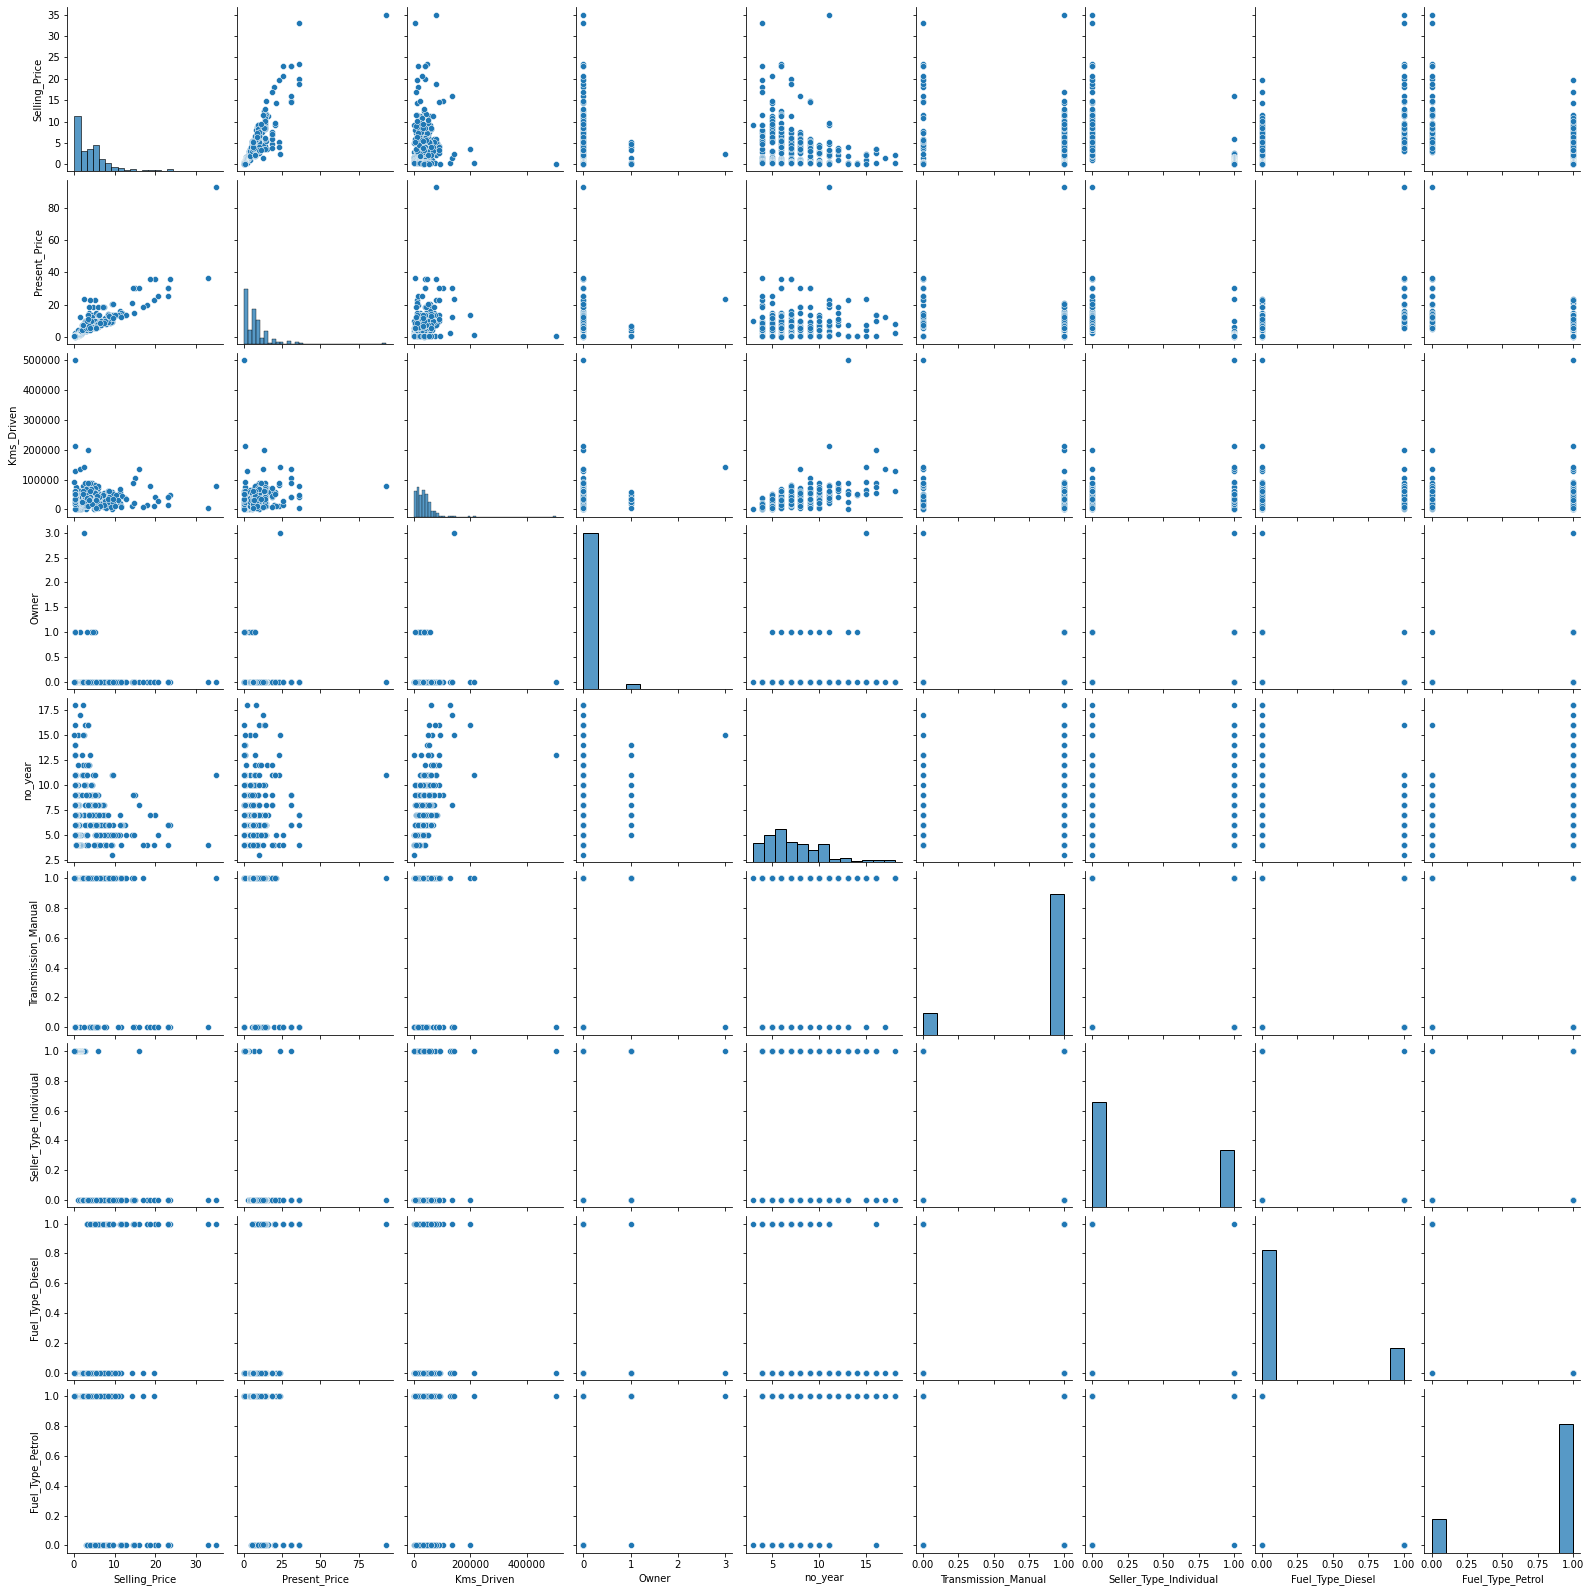

In [21]:
sns.pairplot(final_dataset)

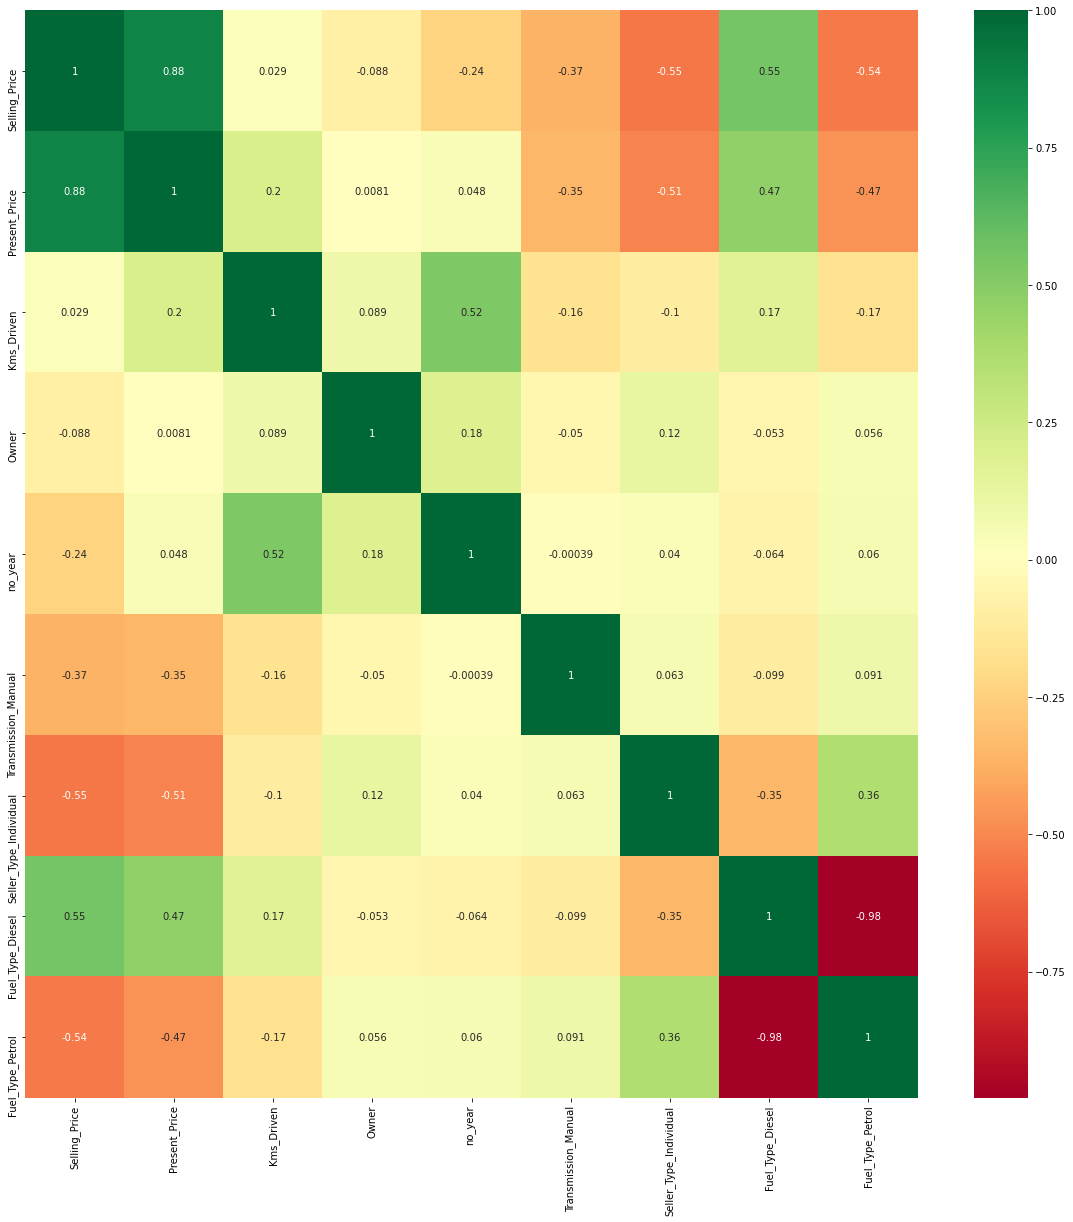

In [22]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')


In [23]:
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [24]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Transmission_Manual,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol
0,5.59,27000,0,7,1,0,0,1
1,9.54,43000,0,8,1,0,1,0
2,9.85,6900,0,4,1,0,0,1
3,4.15,5200,0,10,1,0,0,1
4,6.87,42450,0,7,1,0,1,0


In [25]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [26]:
from  sklearn.ensemble import ExtraTreesRegressor 

In [27]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [28]:
print(model.feature_importances_)

[0.36272764 0.04559696 0.00042097 0.07577959 0.13885882 0.1307066
 0.23127108 0.01463834]


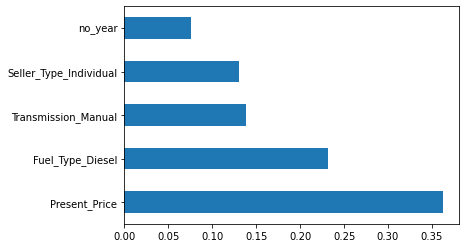

In [30]:
#plot graph of featire importance for better visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind = "barh")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [32]:
X_train.shape

(240, 8)

In [33]:
y_train.shape

(240,)

In [34]:
X_test.shape

(61, 8)

In [35]:
y_test.shape

(61,)

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
##Hyperparameter
import numpy as np
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num=12)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [43]:
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [47]:
# Create the random grid
random_grid = {"n_estimators": n_estimators,
              "max_features": max_features,
              "max_depth" : max_depth,
              "min_samples_split" : min_samples_split,
              "min_samples_leaf" : min_samples_leaf}

In [48]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [49]:
# use the random grid search cv for best hyperparameter
#First create the base model to tune
rf = RandomForestRegressor()

In [50]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = "neg_mean_squared_error", n_iter = 10,cv=5, verbose=2, random_state=42, n_jobs = 1)

In [51]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [52]:
predictions = rf_random.predict(X_test)

In [53]:
predictions

array([ 6.87004,  5.48354,  0.39021,  3.68732,  2.78707,  0.53984,
        4.45505,  5.37076,  0.49751,  3.11172,  1.08375,  0.51285,
        5.90828,  8.84802,  0.63486, 21.10563,  0.40528,  5.94544,
        0.62305,  4.2083 ,  4.65206,  2.89515,  0.57211,  7.55583,
        8.19328,  2.63742, 10.06858,  7.07326,  4.11948,  0.52453,
        2.38575,  5.80614,  5.92505,  9.35664,  5.3418 ,  5.5286 ,
        0.95188,  4.12307,  9.10093,  0.50785,  7.98704,  5.04832,
        1.44849, 22.30356,  5.7032 ,  4.87771,  7.15455,  7.46725,
        6.0198 ,  8.01207,  0.91993,  5.88233,  0.64231,  1.02621,
        3.63136,  5.82955,  4.99867,  7.43669,  1.37203,  0.8016 ,
        4.24565])

C:\Users\Yusuf\anaconda3\envs\car_prediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

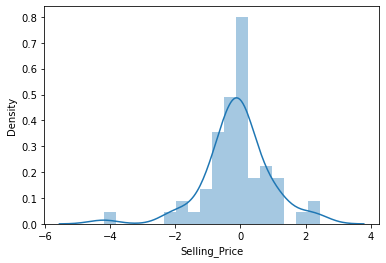

In [56]:
sns.distplot(y_test-predictions)

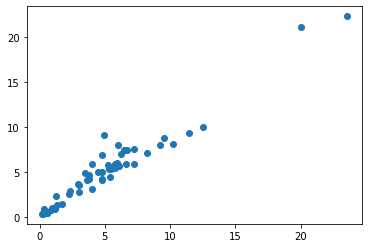

In [57]:
plt.scatter(y_test, predictions)

In [58]:
import pickle


In [59]:
# open a file, where you want to store the data
file = open('random_forest_model.pkl',"wb")
#dump information to that life
pickle.dump(rf_random, file)